In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# ### Now I just Want to create DataFrame
# ins = pd.DataFrame({"Age":[22,25,47,52,46],"Bought_insurance":[0,0,1,0,1]})
# ins
df = pd.read_excel("insurance_example.xlsx")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


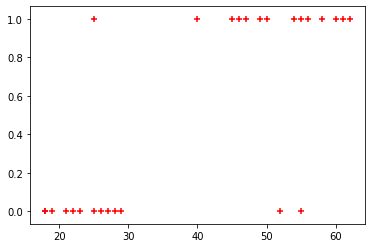

In [3]:
plt.scatter(df.age,df.bought_insurance,marker = "+",color = "red")

In [4]:
df.shape

(27, 2)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(df[["age"]],df.bought_insurance,test_size = 0.3)

In [7]:
x_train

,age
8,62
16,25
10,18
23,45
11,28
13,29
3,52
1,25
0,22
12,27


In [8]:
x_test

,age
22,40
26,23
25,54
20,21
19,18
6,55
4,46
21,26
9,61


In [9]:
y_train

8     1
16    1
10    0
23    1
11    0
13    0
3     0
1     0
0     0
12    0
5     1
15    1
18    0
14    1
7     1
24    1
17    1
2     1
Name: bought_insurance, dtype: int64

In [10]:
y_test

22    1
26    0
25    1
20    0
19    0
6     0
4     1
21    0
9     1
Name: bought_insurance, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logreg = LogisticRegression()
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
logreg.predict(x_test)

array([1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [15]:
x_test.values.tolist()

[[40], [23], [54], [21], [18], [55], [46], [26], [61]]

In [16]:
print("".join(map(str,x_test.values.tolist())))


[40][23][54][21][18][55][46][26][61]


In [17]:
y_test

22    1
26    0
25    1
20    0
19    0
6     0
4     1
21    0
9     1
Name: bought_insurance, dtype: int64

In [18]:
logreg.score(x_test,y_test)

0.8888888888888888

In [69]:
logreg.predict_proba(x_test)

array([[0.4094317 , 0.5905683 ],
       [0.88955739, 0.11044261],
       [0.08424214, 0.91575786],
       [0.91488246, 0.08511754],
       [0.94308321, 0.05691679],
       [0.07375951, 0.92624049],
       [0.22584579, 0.77415421],
       [0.83935358, 0.16064642],
       [0.03242299, 0.96757701]])

In [21]:
logreg.predict_proba(x_test)

array([[0.4094317 , 0.5905683 ],
       [0.88955739, 0.11044261],
       [0.08424214, 0.91575786],
       [0.91488246, 0.08511754],
       [0.94308321, 0.05691679],
       [0.07375951, 0.92624049],
       [0.22584579, 0.77415421],
       [0.83935358, 0.16064642],
       [0.03242299, 0.96757701]])

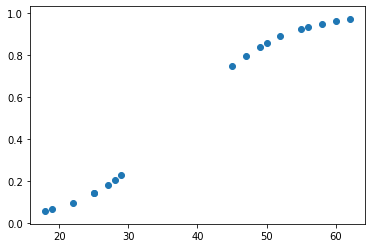

In [28]:
plt.scatter(x_train,logreg.predict_proba(x_train)[:,1])

C:\Users\aakas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\aakas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


Text(0.5, 1.0, 'Test_Logistic')

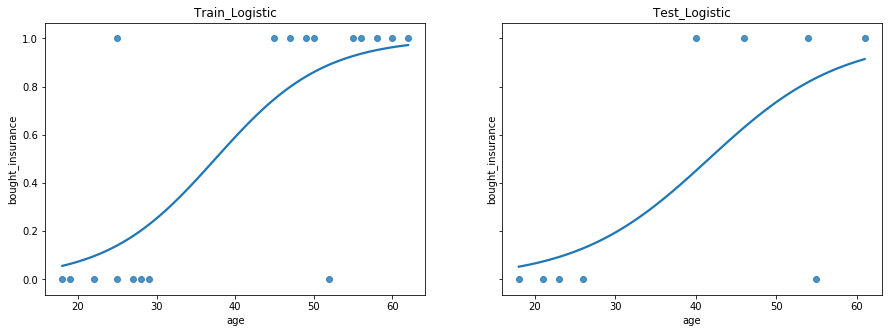

In [71]:
import seaborn as sns
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey=True)
# plt.subplots_adjust()
fig.set_size_inches(15, 5)
sns.regplot(x=x_train, y=y_train, data=df, logistic=True,ax=ax1)
sns.regplot(x=x_test, y=y_test, data=df, logistic=True,ax=ax2)
ax1.set_title("Train_Logistic")
ax2.set_title("Test_Logistic")